In [4]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from keras.applications.vgg16 import VGG16
from keras import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import pickle


Displaying top 5 images from with_mask:


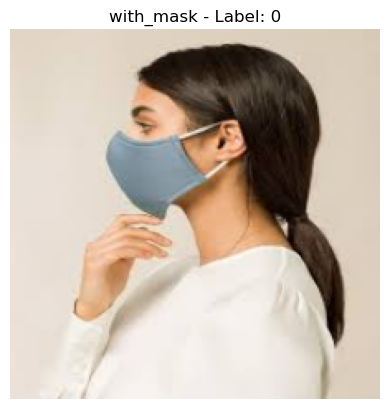

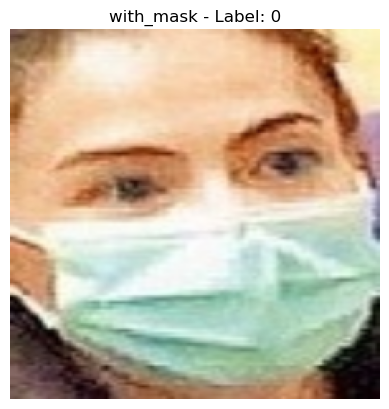

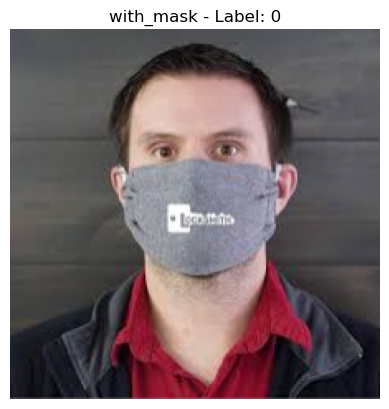

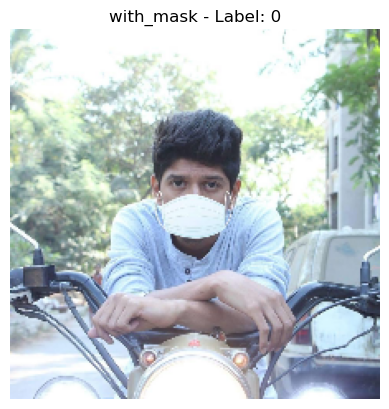

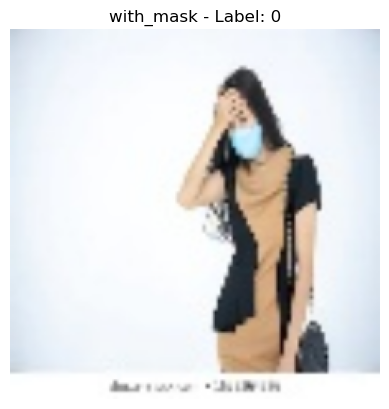

Displaying top 5 images from without_mask:


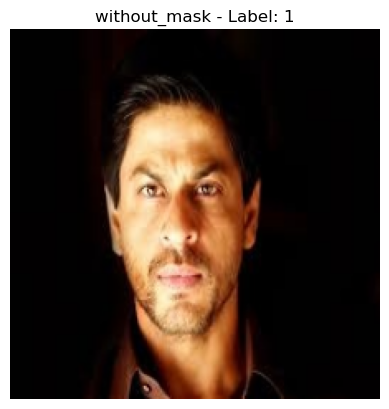

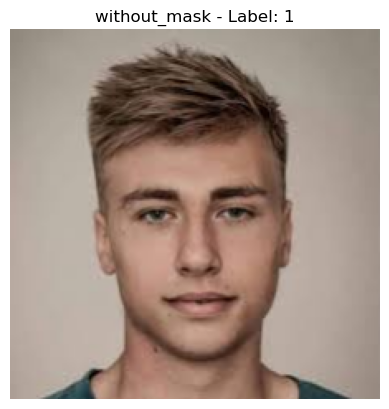

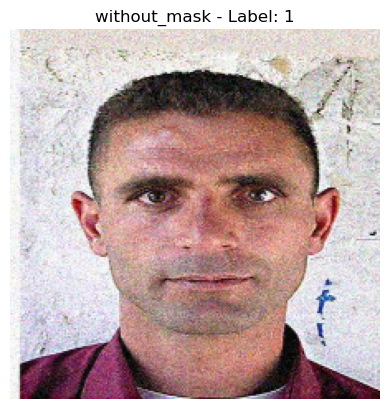

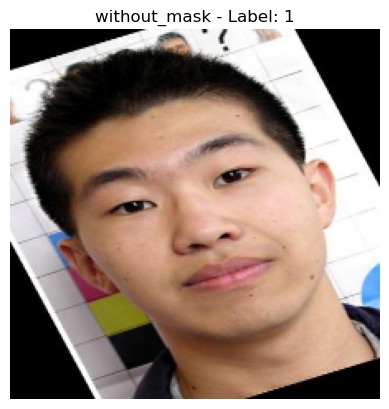

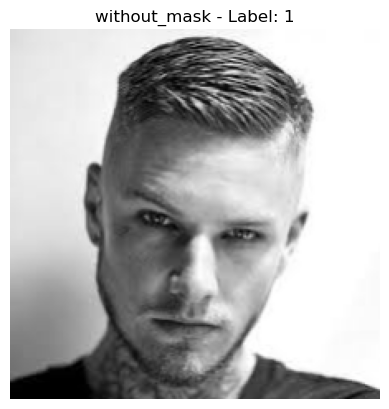

In [16]:
categories = ['with_mask', 'without_mask']

# Load and Preview Data
data = []
for category in categories:
    path = os.path.join('dataset', category)
    label = categories.index(category)
    files = os.listdir(path)  # Get all files in the category
    print(f"Displaying top 5 images from {category}:")
    
    for i, file in enumerate(files):
        imgpath = os.path.join(path, file)
        img = cv2.imread(imgpath)
        img_resized = cv2.resize(img, (224, 224))
        data.append([img_resized, label])
        
        # Display only the first 5 images for preview
        if i < 5:
            plt.imshow(cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB))
            plt.title(f"{category} - Label: {label}")
            plt.axis("off")
            plt.show()



In [17]:
len(data)

7553

In [18]:
# Prepare Data for Training
X = [features for features, label in data]
y = [label for features, label in data]

X = np.array(X) / 255.0  # Normalize images
y = np.array(y)


In [19]:
# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [20]:
# Data Augmentation for Better Generalization
datagen = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest",
)

datagen.fit(X_train)


In [21]:
# Load Pre-trained VGG16 Model
vgg = VGG16(include_top=False, input_shape=(224, 224, 3))
model = Sequential()


In [22]:
# Freeze VGG Layers and Add Custom Layers
for layer in vgg.layers[:-1]:
    model.add(layer)

for layer in model.layers:
    layer.trainable = False  # Freeze pre-trained layers

In [23]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [24]:
# Add Fully Connected Layers
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))  # Prevent overfitting
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │    25,690,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40,405,313 (154.13 MB)

 Trainable params: 25,690,625 (98.00 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [26]:
# Compile Model
model.compile(optimizer=Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])


In [27]:
# Train Model
history = model.fit(datagen.flow(X_train, y_train, batch_size=32), validation_data=(X_test, y_test), epochs=10)


Epoch 1/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 398s 2s/step - accuracy: 0.7906 - loss: 0.5103 - val_accuracy: 0.9643 - val_loss: 0.1002
Epoch 2/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 386s 2s/step - accuracy: 0.9345 - loss: 0.1659 - val_accuracy: 0.9775 - val_loss: 0.0673
Epoch 3/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 386s 2s/step - accuracy: 0.9479 - loss: 0.1372 - val_accuracy: 0.9735 - val_loss: 0.0690
Epoch 4/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 383s 2s/step - accuracy: 0.9513 - loss: 0.1318 - val_accuracy: 0.9676 - val_loss: 0.0802
Epoch 5/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 384s 2s/step - accuracy: 0.9475 - loss: 0.1370 - val_accuracy: 0.9801 - val_loss: 0.0560
Epoch 6/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 384s 2s/step - accuracy: 0.9596 - loss: 0.1041 - val_accuracy: 0.9782 - val_loss: 0.0553
Epoch 7/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 384s 2s/step - accuracy: 0.9603 - loss: 0.1026 - val_accuracy: 0.9808 - val_loss: 0.0449
Epoch 8/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 384s 2s/step - accuracy: 0.9617 - loss: 0.0952 - val_accu

In [29]:
# Save Model
model_file = "model2.pkl"
with open(model_file, 'wb') as file:
    pickle.dump(model, file)
print(f"Model saved to {model_file}")


Model saved to model2.pkl


In [31]:

# Save the history
with open('history.pkl', 'wb') as file:
    pickle.dump(history.history, file)
print("History saved as 'history.pkl'")

History saved as 'history.pkl'


In [6]:
import pickle

# Load the model from the pickle file
with open('model2.pkl', 'rb') as f:
    model = pickle.load(f)

print("Model loaded successfully!")


Model loaded successfully!


In [7]:
# Predict Mask Detection
def detect_face_mask(img):
    prediction = model.predict(img.reshape(1, 224, 224, 3))[0][0]
    print(prediction)
    return 0 if prediction < 0.5 else 1  # Threshold at 0.5 for binary output



In [8]:
def draw_label(img, text, pos, bg_color):
    text_size = cv2.getTextSize(text, cv2.FONT_HERSHEY_SIMPLEX, 5, 2)[0]  # [0] returns text size
    end_x = pos[0] + text_size[0] + 2
    end_y = pos[1] + text_size[1] - 2

    # Draw rectangle for background
    cv2.rectangle(img, pos, (end_x, end_y), bg_color, -1)

    # Draw text on the rectangle
    cv2.putText(img, text, (pos[0], end_y), cv2.FONT_HERSHEY_SIMPLEX, 4, (0, 0, 0), 4, cv2.LINE_AA)


In [9]:
# Real-time Face Mask Detection
cap = cv2.VideoCapture(0)
if not cap.isOpened():
    print("Error: Could not access the camera.")
    exit()

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Flip the frame horizontally to remove mirror effect
    frame = cv2.flip(frame, 1)  # Flip horizontally (1) for non-mirrored output

    # Resize and normalize the image
    img = cv2.resize(frame, (224, 224))
    img = img / 255.0
    
    # Get mask prediction
    y_pred = detect_face_mask(img)

    # Draw label based on prediction
    if y_pred == 0:
        draw_label(frame, "Mask", (30, 30), (0, 255, 0))  # Green for "Mask"
    else:
        draw_label(frame, "No Mask", (30, 30), (0, 0, 255))  # Red for "No Mask"

    # Display the frame
    cv2.imshow("window", frame)

    # Process GUI events and check if the window is closed
    key = cv2.waitKey(1)  # Short delay to process events
    if key & 0xFF == ord('x') or cv2.getWindowProperty("window", cv2.WND_PROP_VISIBLE) < 1:
        break

# Release resources and close window
cap.release()
cv2.destroyAllWindows()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
0.11790959
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
0.08979242
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
0.095856
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
0.16884449
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
0.16064395
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
0.1956603


2024-12-04 20:10:46.582 python[53036:4220333] +[IMKClient subclass]: chose IMKClient_Modern
2024-12-04 20:10:46.582 python[53036:4220333] +[IMKInputSession subclass]: chose IMKInputSession_Modern


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
0.21657242
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
0.2262134
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
0.9703624
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
0.996754
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
0.99409276
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
0.99750936
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
0.99758273
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
0.9947016
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
0.9941671
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
0.99273175
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
0.9955327
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
0.9916969
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
0.91982365
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
0.8754211
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
0.93615544
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
0.8978743
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
0.9124524
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
0.87884533
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
0.87036103
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
0.8769879
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms

KeyboardInterrupt: 